<a href="https://colab.research.google.com/github/HUGOBROWNING/Machine-learning-from-scratch/blob/main/housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
path = '/content/sample_data/california_housing_train.csv'
data = pd.read_csv(path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [22]:
data.shape

(17000, 9)

In [23]:
data = data.dropna()
data = data.drop_duplicates()
data.shape

(17000, 9)

<Axes: >

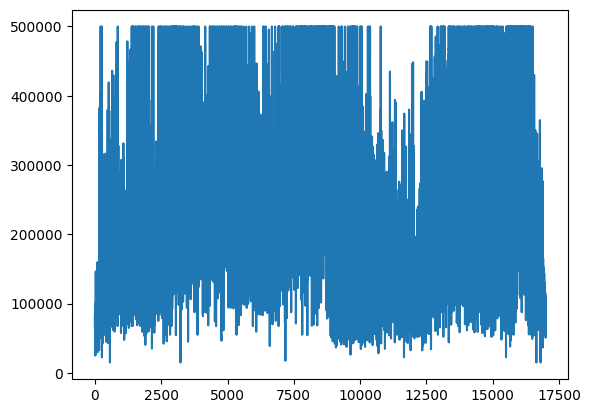

In [24]:
data['median_house_value'].plot()

<Axes: >

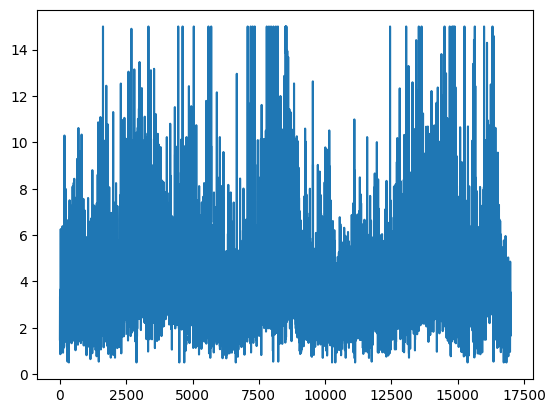

In [26]:
data['median_income'].plot()

In [34]:
X = data.drop(columns = ['median_house_value'], axis =1 )
y = data['median_house_value']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
nums = X.select_dtypes(include = 'number').columns.tolist()
from sklearn.metrics import mean_squared_error, r2_score
pre = ColumnTransformer(
    transformers=[
        ('nums', StandardScaler(), nums)
    ],
    remainder = 'passthrough'
)
model = Pipeline(
    steps = [
        ('Preprocessing', pre),
        ('Lin Reg', LinearRegression(fit_intercept = True))
    ]
)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

array([143770.39502966, 398615.57056492,  86341.10306744, ...,
        26482.39645032, 283556.48183171, 115808.80622263])

In [38]:
mse = round(mean_squared_error(y_test, y_pred), 4)
import numpy as np
mean = np.mean(y_test)
sum_res = np.sum((y_test - y_pred)**2)
sum_tot = np.sum((y_test - mean)**2)
r2 = 1 - (sum_res / sum_tot)
r = r2_score(y_test, y_pred)
mse, round(r2, 4), r

(4634658406.2234, 0.6636, 0.6636396350243802)

In [40]:
res = y_test - y_pred
res

,median_house_value
10941,-1070.395030
5250,101385.429435
10292,-24541.103067
2266,14265.646467
6398,-56602.298086
...,...
4706,32270.219251
8404,109778.101552
11114,136017.603550
7877,77143.518168


<Axes: xlabel='median_house_value', ylabel='Count'>

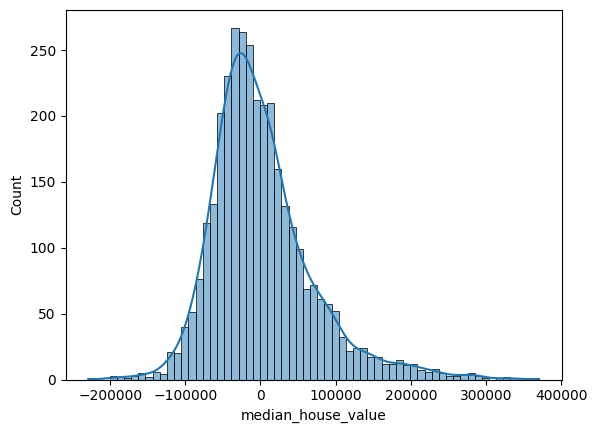

In [41]:
import seaborn as sns
sns.histplot(res, kde = True)

<Axes: xlabel='median_house_value'>

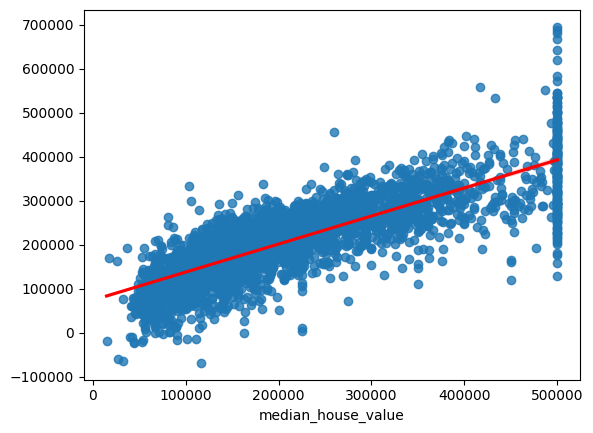

In [42]:
sns.regplot(x = y_test, y = y_pred, line_kws = {'color': 'red'})

In [2]:
data.shape

(17000, 9)

In [4]:
data = data.dropna()
data = data.drop_duplicates()
data.shape

(17000, 9)

<Axes: >

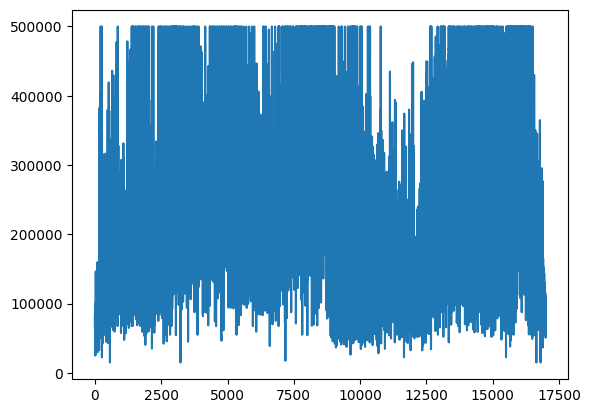

In [5]:
data['median_house_value'].plot()

<Axes: >

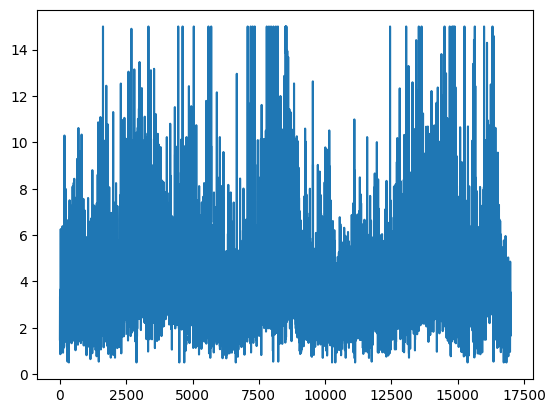

In [6]:
data['median_income'].plot()

In [23]:
from sklearn.model_selection import train_test_split
X = data.drop(columns = ['median_house_value'], axis = 1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
num_cols= X.select_dtypes(include = 'number').columns.tolist()
pre = ColumnTransformer(
    transformers = [
        ('nums', StandardScaler(), num_cols)
    ]
)
model = Pipeline(
    steps = [
        ('preprocessing', pre),
        ('RFRG', RandomForestRegressor(random_state = 42))
    ]
)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([149016.  , 479174.54,  80242.  , ...,  93626.  , 317156.06,
       222311.07])

<Axes: xlabel='median_house_value', ylabel='Count'>

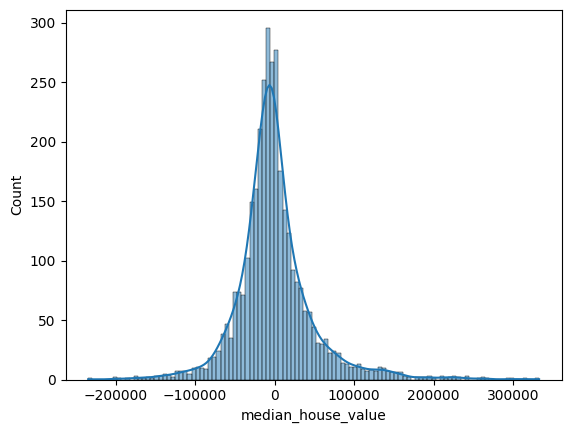

In [25]:
import seaborn as sns
sns.histplot(y_test - y_pred, kde = True)

<Axes: xlabel='median_house_value'>

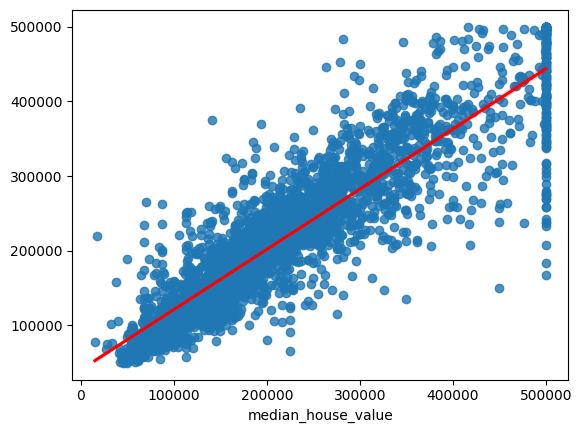

In [26]:
sns.regplot(x = y_test, y = y_pred, line_kws={"color": "red"})